In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')

In [45]:
df = pd.read_csv('eurusd.csv', parse_dates= ['Date'], index_col='Date')
df

,price
Date,
2004-01-01,1.258194
2004-01-02,1.258194
2004-01-05,1.268698
2004-01-06,1.272103
2004-01-07,1.264095
...,...
2020-06-24,1.131235
2020-06-25,1.125087
2020-06-26,1.122208


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4275 entries, 2004-01-01 to 2020-06-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   4275 non-null   float64
dtypes: float64(1)
memory usage: 66.8 KB


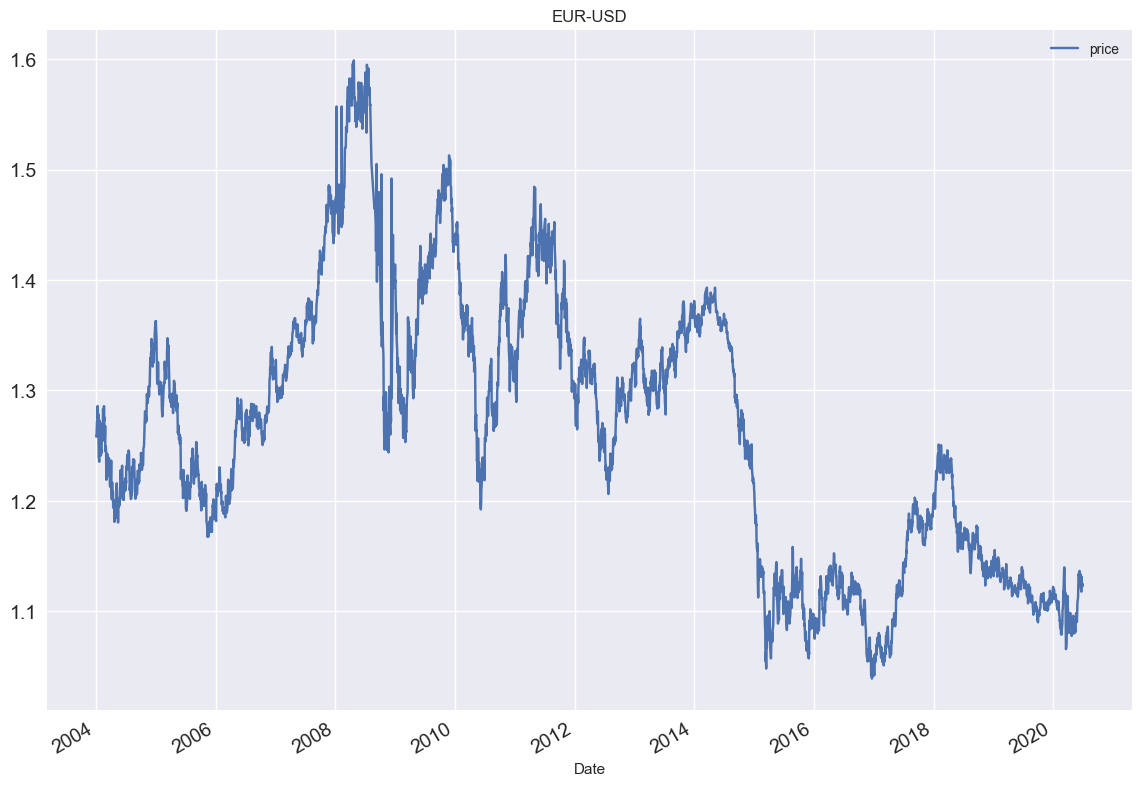

In [47]:
df.plot(figsize= (14, 10), title= 'EUR-USD', fontsize= 14)
plt.show()

In [48]:
#Daily price movement in favour of EUR (positive)
df['returns'] = np.log(df.div(df.shift(1)))
df

,price,returns
Date,,
2004-01-01,1.258194,NaN
2004-01-02,1.258194,0.000000
2004-01-05,1.268698,0.008313
2004-01-06,1.272103,0.002681
2004-01-07,1.264095,-0.006315
...,...,...
2020-06-24,1.131235,0.002892
2020-06-25,1.125087,-0.005449
2020-06-26,1.122208,-0.002562


A Simple Buy and Hold Strategy

In [49]:
df.dropna(inplace=True)
df

,price,returns
Date,,
2004-01-02,1.258194,0.000000
2004-01-05,1.268698,0.008313
2004-01-06,1.272103,0.002681
2004-01-07,1.264095,-0.006315
2004-01-08,1.277498,0.010547
...,...,...
2020-06-24,1.131235,0.002892
2020-06-25,1.125087,-0.005449
2020-06-26,1.122208,-0.002562


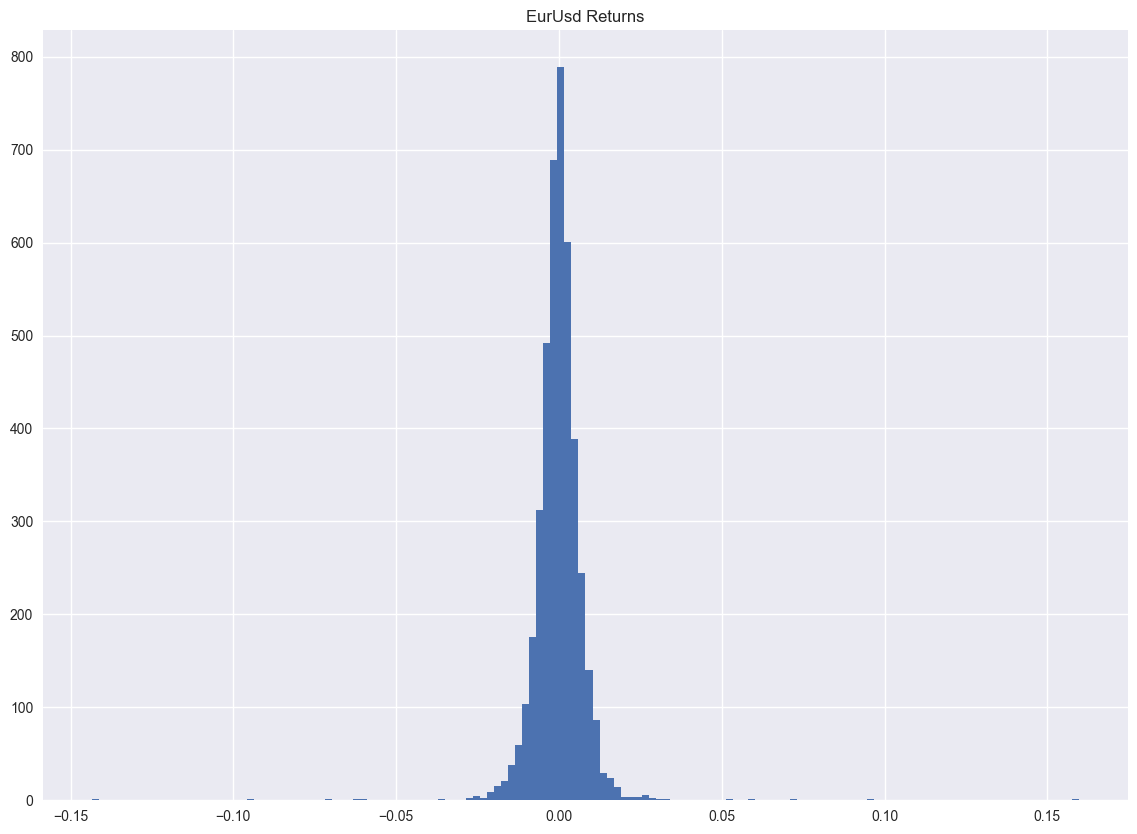

In [50]:
df.returns.hist(bins=140, figsize=(14, 10))
plt.title("EurUsd Returns")
plt.show()

In [51]:
df.returns.sum()

-0.11214302770699758

In [52]:
# 1 dollar invest 
np.exp(df.returns.sum())
# or first price divide by last price
#df.price[-1] / df.price[0]

0.8939163935445148

In [66]:
#dollar returns
df['cumulative_returns'] = df.returns.cumsum().apply(np.exp)


In [71]:
df=df.drop('cumsum_returns', axis='columns')

<AxesSubplot: title={'center': 'EUR-USD -Buy Hold'}, xlabel='Date'>

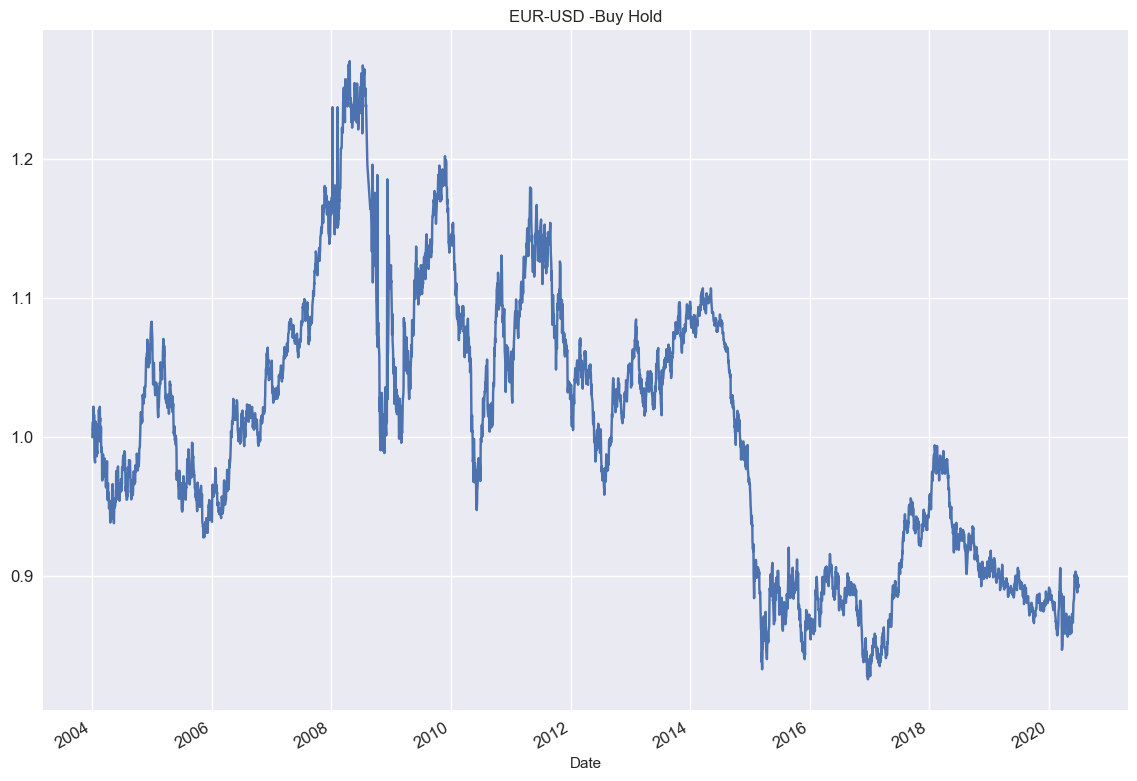

In [73]:
df.cumulative_returns.plot(figsize=(14, 10), title='EUR-USD -Buy Hold', fontsize=12)

In [74]:
# Cumulative Maximum
df['cummax'] = df.cumulative_returns.cummax()

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4274 entries, 2004-01-02 to 2020-06-30
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   price               4274 non-null   float64
 1   returns             4274 non-null   float64
 2   cumulative_returns  4274 non-null   float64
 3   cummax              4274 non-null   float64
dtypes: float64(4)
memory usage: 296.0 KB


<AxesSubplot: title={'center': 'EUR-USD max Drawdown'}, xlabel='Date'>

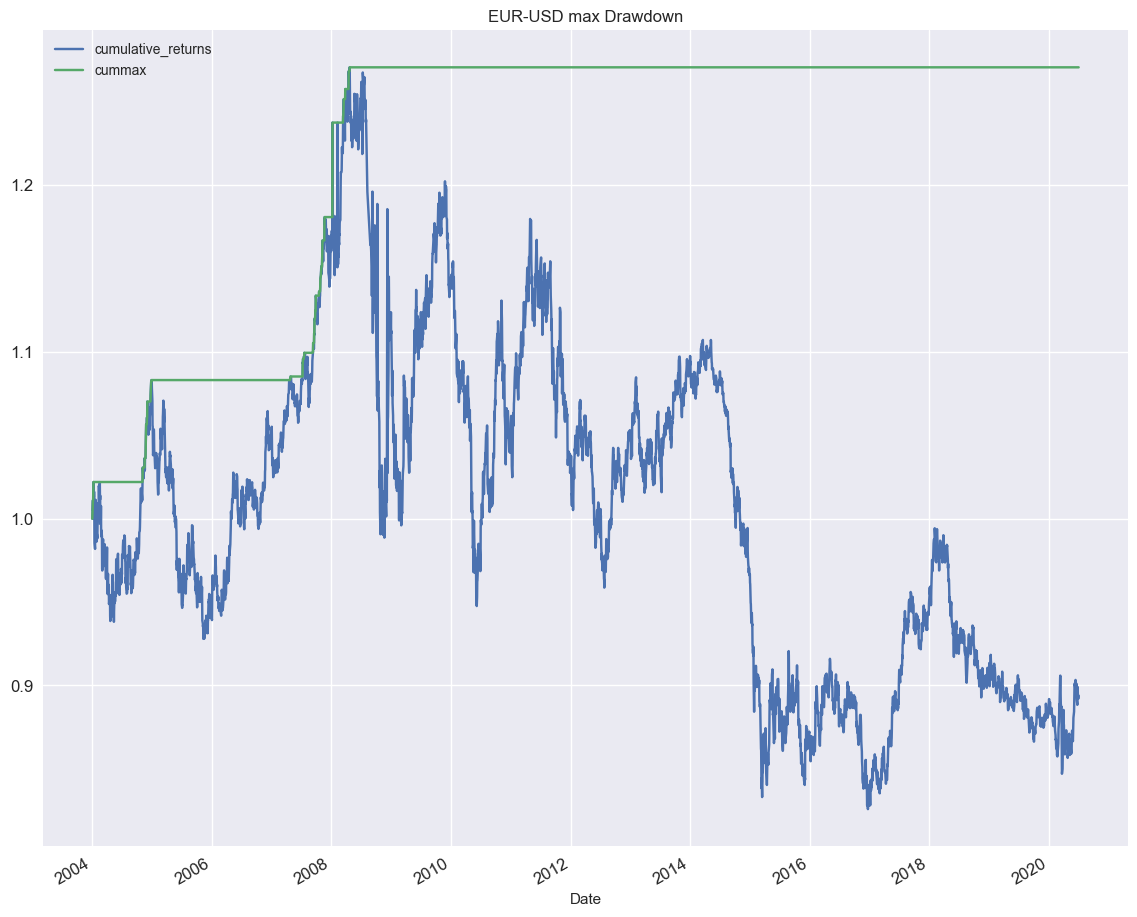

In [77]:
df[['cumulative_returns', 'cummax']].plot(figsize= (14, 12), title="EUR-USD max Drawdown", fontsize= 12)

In [82]:
drawdown = df['cummax'] - df['cumulative_returns']
drawdown

Date
2004-01-02    0.000000
2004-01-05    0.000000
2004-01-06    0.000000
2004-01-07    0.006365
2004-01-08    0.000000
                ...   
2020-06-24    0.371615
2020-06-25    0.376500
2020-06-26    0.378788
2020-06-29    0.378488
2020-06-30    0.376792
Length: 4274, dtype: float64

In [81]:
drawdown.max()

0.4448840569933439

In [85]:
# index timestamp maximum drawdown
drawdown.idxmax() # It was Brexit

Timestamp('2016-12-21 00:00:00')